In [1]:
import os
HOME = os.getcwd()

%cd /teamspace/studios/this_studio/Deeplab/
from inference.infer import *
from post_processing.control_random_field import *
from dotenv import load_dotenv

env_path = '/teamspace/studios/this_studio/Deeplab/credentials.env'
load_dotenv(dotenv_path=env_path)

os.chdir(HOME)
print(os.getcwd())

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


/teamspace/studios/this_studio/Deeplab
/teamspace/studios/this_studio/discriminator_false_label


In [7]:
print(len(os.listdir('/teamspace/studios/this_studio/discriminator_false_label/dataset/binary_masks')))

68


In [ ]:
sample_dir = 
samples_list  = []

In [5]:
labels_dir = '/teamspace/studios/this_studio/discriminator_false_label/dataset/labels'
positive_samples = 0
for i in os.listdir(labels_dir):
    with open(os.path.join(labels_dir,i), 'r') as f:
        if f.readline() == '0':
            positive_samples+=1
        f.close()

print(positive_samples)


        

33


In [8]:
import torch 
a = torch.zeros(1)
print(a)

tensor([0.])


In [2]:
def convert_path(sample_path):
    # Split the sample path to isolate the filename
    parts = sample_path.split('/')
    filename = parts[-1]
    
    # Remove the file extension from the filename
    name, ext = filename.rsplit('.', 1)
    
    # Append '_binarymask' to the filename
    new_name = f"{name}_binarymask.{ext}"
    
    # Replace 'samples' with 'binary_masks' in the path
    parts[-2] = 'binary_masks'
    
    # Replace the filename with the new filename
    parts[-1] = new_name
    
    # Join the parts back into a single path
    new_path = '/'.join(parts)
    return new_path

print(convert_path('Deeplab/india_sam_dino_annotations/samples/india_psidguaj (guava)2020.10.22.13.45.02_25.248391666666667_79.33123666666667_5345b0ba-6dae-4028-9b2e-bb759b43230c_img_20201022_130948_4162065640688200048.jpg'))

Deeplab/india_sam_dino_annotations/binary_masks/india_psidguaj (guava)2020.10.22.13.45.02_25.248391666666667_79.33123666666667_5345b0ba-6dae-4028-9b2e-bb759b43230c_img_20201022_130948_4162065640688200048_binarymask.jpg


In [5]:
image_paths, mask_paths, labels = [],[],[]

In [34]:
def add_label(img_path, dest_folder = '/teamspace/studios/this_studio/discriminator_false_label/dataset'):
    do = input('add it to dataset?')
    if do == '':
        img_name = img_path.split('/')[-1]  # with the extension
        filename, ext = img_name.rsplit('.', 1)    # filename is without the extension
        mask_name = f"{filename}_binarymask.{ext}" # with the extension
        shutil.copy(img_path, os.path.join(dest_folder,'samples' ,img_name))
        shutil.copy(convert_path(img_path), os.path.join(dest_folder, 'binary_masks', mask_name))
        with open(os.path.join(dest_folder, 'labels', f"{filename}_label.txt"),'w') as f:
            f.write('1')
        print('added as a good sample')
    elif do == 'b':
        img_name = img_path.split('/')[-1]  # with the extension
        filename, ext = img_name.rsplit('.', 1)    # filename is without the extension
        mask_name = f"{filename}_binarymask.{ext}" # with the extension
        shutil.copy(img_path, os.path.join(dest_folder,'samples' ,img_name))
        shutil.copy(convert_path(img_path), os.path.join(dest_folder, 'binary_masks', mask_name))
        with open(os.path.join(dest_folder, 'labels', f"{filename}_label.txt"),'w') as f:
            f.write('0') 
        print('added as a bad sample')
    else:
        print('passed')
            
        


In [7]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import torch
import torchvision.transforms as transforms
import shutil

def show_mask(img_np, pred, input_box = None):
    plt.figure(figsize=(10, 10))
    # Create a blue mask based on the prediction
    blue_mask = np.zeros_like(img_np)
    blue_mask[:, :, 2] = pred 
    # Plot the image and the mask overlay
    plt.imshow(img_np)
    plt.imshow(blue_mask, alpha=0.7)
    if input_box is not None:
        show_box(input_box, plt.gca())

    plt.axis('off')
    plt.gca().xaxis.set_major_locator(plt.NullLocator())
    plt.gca().yaxis.set_major_locator(plt.NullLocator())

    plt.show()
    plt.close()
    
def overlayed_mask(img_path):
    # img_path = 'Deeplab/india_sam_dino_annotations/samples/india_psidguaj (guava)2020.10.21.17.01.50_22.043116120621562_86.3750886451453_109e2e3c-ef60-4710-8058-5d5884f25038_img_20201020_140157_2815177404586427848.jpg'
    img = flip(Image.open(img_path).convert('RGB'))
    transform = transforms.Grayscale(num_output_channels=1)
    img_np = transform(img)
    mask_path = convert_path(img_path)
    mask = flip(Image.open(mask_path).convert('RGB'))
    mask_np = transform(mask)
    show_mask(np.array(img), np.array(mask_np))
    
    

In [8]:
img_path = '/teamspace/studios/this_studio/Deeplab/india_sam_dino_annotations/samples/india_psidguaj (guava)2020.10.21.17.01.50_22.043116120621562_86.3750886451453_109e2e3c-ef60-4710-8058-5d5884f25038_img_20201020_140157_2815177404586427848.jpg'

In [19]:
import random
india_samples_location = '/teamspace/studios/this_studio/Deeplab/india_sam_dino_annotations/samples'
sample_list_india = [os.path.join(india_samples_location, i) for i in os.listdir(india_samples_location)]
freetown_haiti_afrifa_location = '/teamspace/studios/this_studio/Deeplab/crf_sam_annotations/samples'
sample_list_other = [os.path.join(freetown_haiti_afrifa_location, i) for i in os.listdir(freetown_haiti_afrifa_location)]
inhouse_samples = []
inhouse_samples.extend(sample_list_india)
inhouse_samples.extend(sample_list_other)
print(len(inhouse_samples))
random_samples = random.sample(inhouse_samples, 50)

500


In [56]:
random.shuffle(random_samples)

In [69]:
i = 2

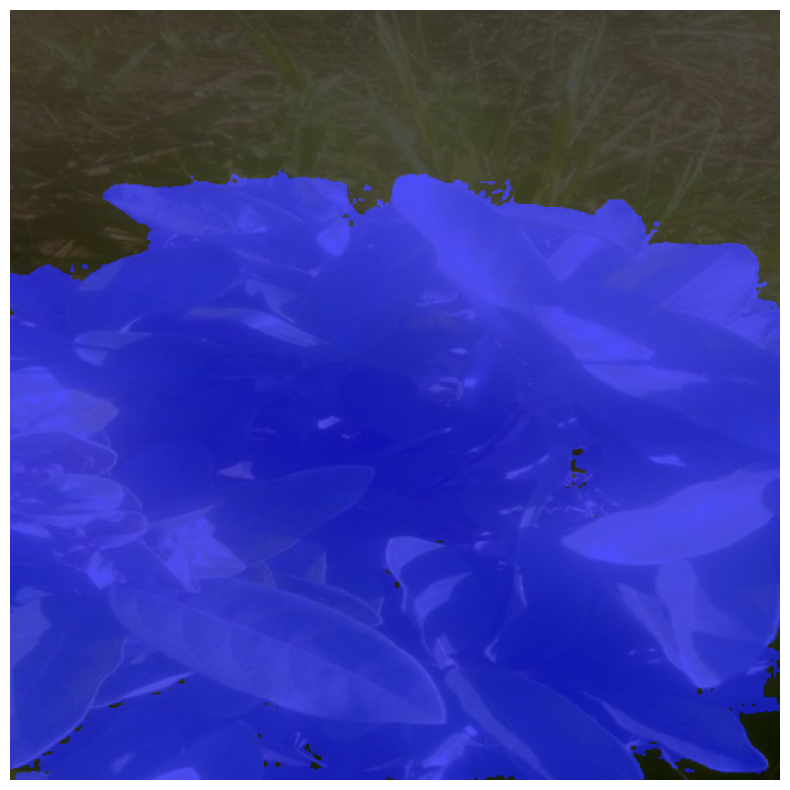

/teamspace/studios/this_studio/Deeplab/crf_sam_annotations/samples/eastafrica_albiziac_2023.01.03.22.39.46_-5.2527669999999995_38.73413766666667_51f98ef1-55d8-4e41-b9d6-5ef6916ebbad_img_20230103_155637_8353328229188064192.jpg


add it to dataset? m


passed
16


In [83]:

overlayed_mask(sample_list_other[i])
print(sample_list_other[i])
add_label(sample_list_other[i])
i+=1
print(i)


In [85]:
print(len(os.listdir('/teamspace/studios/this_studio/discriminator_false_label/dataset/samples')))

40
